## Step 4
Continuing from sentimentlive_btc.

In [3]:
import yfinance as yf
import os
import pandas as pd

In [4]:
btc_ticker = yf.Ticker("BTC-USD")

In [5]:
btc = btc_ticker.history(period="max")

In [6]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-26 00:00:00+00:00,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,0.0,0.0
2024-05-27 00:00:00+00:00,68512.179688,70597.882812,68232.500000,69394.554688,25870990717,0.0,0.0
2024-05-28 00:00:00+00:00,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.0,0.0


In [7]:
btc.index = pd.to_datetime(btc.index)

In [10]:
del btc["Dividends"]
del btc["Stock Splits"]

In [11]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

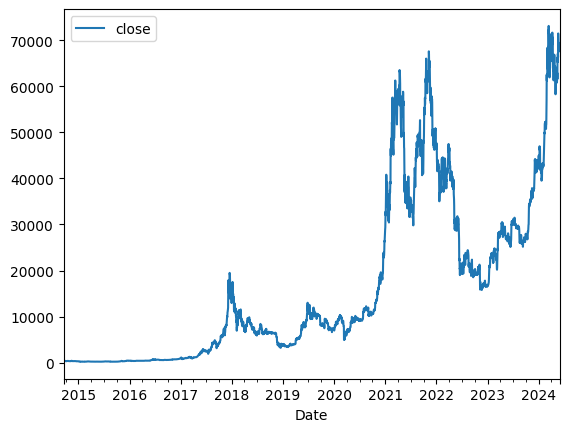

In [12]:
btc.plot.line(y="close", use_index=True)

In [13]:
wiki = pd.read_csv("data/wikipedia_edits.csv", index_col=0, parse_dates=True)

In [14]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-05-26,1.000000,-0.156696,0.243519
2024-05-27,0.900000,-0.145586,0.221296
2024-05-28,0.900000,-0.145586,0.221296
2024-05-29,0.900000,-0.145586,0.221296


## Step 5
Preparing data for machine learning.

In [17]:
print(btc.index.dtype)
print(wiki.index.dtype)

datetime64[ns, UTC]
datetime64[ns]


In [19]:
btc.index = btc.index.tz_convert(None)  # Convert to tz-naive

In [20]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [21]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,1.000000,-0.156696,0.243519
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,25870990717,0.900000,-0.145586,0.221296
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.900000,-0.145586,0.221296
2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,26707072906,0.900000,-0.145586,0.221296


In [22]:
btc["tomorrow"] = btc["close"].shift(-1)

In [23]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,1.000000,-0.156696,0.243519,69394.554688
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,25870990717,0.900000,-0.145586,0.221296,68296.218750
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.900000,-0.145586,0.221296,67578.093750
2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,26707072906,0.900000,-0.145586,0.221296,68161.929688


In [24]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [25]:
btc["target"].value_counts()

target
1    1877
0    1667
Name: count, dtype: int64

## Step 6
Training our baseline ML model.

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [34]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.47058823529411764

## Step 7
Evaluating error with backtesting.

In [35]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [36]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

## Step 8
Using an XGBoost model.

In [38]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [41]:
precision_score(predictions["target"], predictions["predictions"])

0.5076252723311547

## Step 9
Improving precision with trends.

In [44]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [45]:
btc, new_predictors = compute_rolling(btc.copy())

In [46]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,1.000000,-0.156696,0.243519,69394.554688,1,...,0.5,0.989029,0.857143,0.428571,1.043365,0.429444,0.483333,1.623800,1.963470,0.512329
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,25870990717,0.900000,-0.145586,0.221296,68296.218750,0,...,0.5,1.005941,0.904762,0.428571,1.057073,0.441111,0.483333,1.640172,1.965571,0.512329
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.900000,-0.145586,0.221296,67578.093750,0,...,0.5,0.993807,0.942857,0.428571,1.040765,0.452778,0.483333,1.609985,1.967671,0.512329
2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,26707072906,0.900000,-0.145586,0.221296,68161.929688,1,...,0.0,0.986524,0.938095,0.428571,1.030362,0.464444,0.483333,1.588964,1.969680,0.512329


In [47]:
predictions = backtest(btc, model, new_predictors)

In [48]:
precision_score(predictions["target"], predictions["predictions"])

0.5294627383015598

In [49]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-05-26,1,1
2024-05-27,0,1
2024-05-28,0,0
2024-05-29,1,1
